In [238]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_multilabel_classification

In [239]:
X,y=make_multilabel_classification(n_samples=5000, n_features=60, n_classes=1,allow_unlabeled=True)

In [240]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [241]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,2.0,2.0,0.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0
1,0.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,3.0
2,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,3.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0
4,0.0,2.0,2.0,3.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,2.0,0.0,0.0,3.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0


In [242]:
y.shape

(5000, 1)

In [243]:
from sklearn.preprocessing import LabelEncoder
leb=LabelEncoder()
y=leb.fit_transform(y[0])

In [244]:
y=pd.DataFrame(y)

In [245]:
y.value_counts()

1    3324
0    1676
dtype: int64

In [246]:
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler(feature_range=(0, 1))
X=pd.DataFrame(scl.fit_transform(X))

In [247]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.092440,0.155022,0.169033,0.166933,0.067733,0.108720,0.157480,0.172360,0.194571,0.100771,0.153320,0.158975,0.159067,0.132686,0.159850,0.089240,0.127467,0.186700,0.087067,0.166286,0.102400,0.181900,0.166233,0.117167,0.084600,0.200257,0.157675,0.144733,0.141875,0.064000,0.073800,0.173867,0.107800,0.135480,0.175800,0.093250,0.193400,0.064480,0.132840,0.151733,0.194767,0.158240,0.132680,0.089900,0.066200,0.145480,0.149167,0.154829,0.150400,0.147514,0.089600,0.075467,0.113467,0.060567,0.129289,0.140689,0.195467,0.157520,0.166943,0.063320
std,0.146134,0.139723,0.167747,0.168441,0.116968,0.153651,0.173199,0.185264,0.173843,0.121551,0.174066,0.146127,0.163241,0.137908,0.148479,0.146152,0.146291,0.179814,0.124768,0.158265,0.148858,0.208077,0.170392,0.140686,0.128459,0.176927,0.148142,0.155211,0.133756,0.135778,0.122705,0.174033,0.133934,0.165053,0.158801,0.172476,0.174129,0.133169,0.163116,0.162870,0.180678,0.177422,0.164418,0.129890,0.119575,0.171258,0.160395,0.153078,0.140943,0.146423,0.147269,0.123680,0.140856,0.115402,0.123522,0.129367,0.184088,0.178196,0.158489,0.131644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.111111,0.166667,0.166667,0.000000,0.000000,0.200000,0.200000,0.142857,0.142857,0.200000,0.125000,0.166667,0.142857,0.125000,0.000000,0.166667,0.166667,0.000000,0.142857,0.000000,0.250000,0.166667,0.166667,0.000000,0.142857,0.125000,0.166667,0.125000,0.000000,0.000000,0.166667,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.166667,0.166667,0.200000,0.000000,0.000000,0.000000,0.200000,0.166667,0.142857,0.125000,0.142857,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.166667,0.200000,0.142857,0.000000
75%,0.200000,0.222222,0.333333,0.333333,0.166667,0.200000,0.200000,0.200000,0.285714,0.142857,0.200000,0.250000,0.166667,0.142857,0.250000,0.200000,0.166667,0.333333,0.166667,0.285714,0.200000,0.250000,0.333333,0.166667,0.166667,0.285714,0.250000,0.166667,0.250000,0.000000,0.166667,0.333333,0.166667,0.200000,0.285714,0.250000,0.285714,0.000000,0.200000,0.166667,0.333333,0.200000,

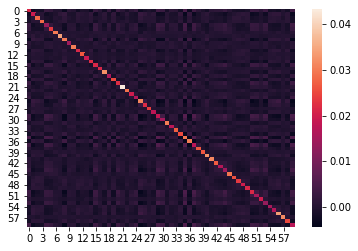

In [248]:
sns.heatmap(X.cov())

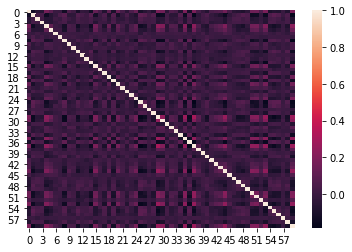

In [249]:
sns.heatmap(X.corr())

# eigen values and vectors

In [250]:
#eigVa,eigVec=np.linalg.eig(X)

# DIMENSIONALITY REDUCTION

## PROJECTION APPROCH


*   PCA
*   linear PCA
*   kernal PCA





In [251]:
from sklearn.decomposition import  PCA
pca=PCA()
plt_pca=pca.fit_transform(X)

In [252]:
plt_pca

array([[ 0.26186478, -0.2376743 , -0.02696919, ...,  0.1681396 ,
        -0.11296733, -0.00099158],
       [ 0.35194509,  0.04183471,  0.00815008, ..., -0.06785069,
        -0.02325594,  0.41882002],
       [-0.3193191 , -0.1220805 , -0.11737415, ..., -0.08880902,
        -0.0098324 , -0.00258393],
       ...,
       [-0.09531425,  0.12034864, -0.14766746, ..., -0.02542468,
         0.00973968, -0.02272067],
       [-0.26718964, -0.18576724,  0.27395171, ...,  0.03312115,
         0.13853892,  0.00448268],
       [-0.39039012, -0.08489334, -0.09096368, ...,  0.11190402,
        -0.0149089 , -0.07185226]])

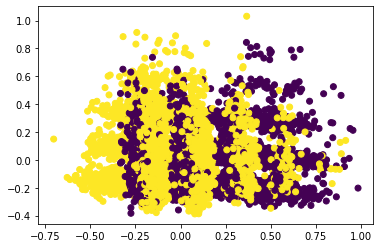

In [253]:
plt.scatter(plt_pca[:,0],plt_pca[:,1],c=y)
plt.scatter(plt_pca[:,1],plt_pca[:,2],c=y)
plt.show()

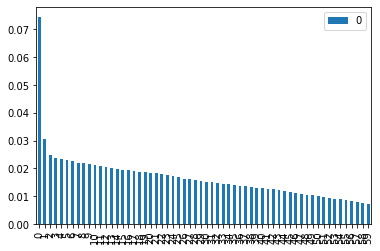

In [254]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()

In [255]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([  7.4,  10.5,  13. ,  15.4,  17.7,  20. ,  22.3,  24.5,  26.7,
        28.9,  31. ,  33.1,  35.1,  37.1,  39.1,  41. ,  42.9,  44.8,
        46.7,  48.6,  50.5,  52.3,  54.1,  55.9,  57.6,  59.3,  60.9,
        62.5,  64.1,  65.7,  67.2,  68.7,  70.2,  71.6,  73. ,  74.4,
        75.8,  77.2,  78.5,  79.8,  81.1,  82.4,  83.6,  84.8,  86. ,
        87.2,  88.3,  89.4,  90.5,  91.5,  92.5,  93.5,  94.5,  95.4,
        96.3,  97.2,  98. ,  98.8,  99.6, 100.3])

In [256]:
from sklearn.decomposition import  PCA
pca=PCA(n_components=2)
plt_pca=pca.fit_transform(X)

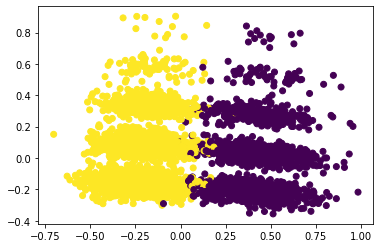

In [257]:
plt.scatter(plt_pca[:,0],plt_pca[:,1],c=y)
plt.show()

INCRIMENTAL PCA

In [258]:
from sklearn.decomposition import  IncrementalPCA
Ipca=IncrementalPCA(n_components=2)
plt_pca=Ipca.fit_transform(X)

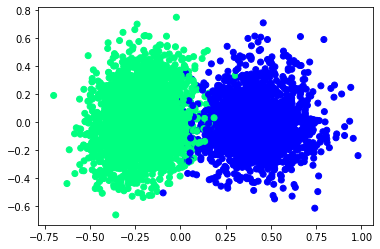

In [259]:
plt.scatter(plt_pca[:,0],plt_pca[:,1],c=y,cmap='winter')
plt.show()

**Kernal PCA**

In [260]:
from sklearn.decomposition import  KernelPCA
Kpca=KernelPCA(n_components=2)
plt_pca=Kpca.fit_transform(X)

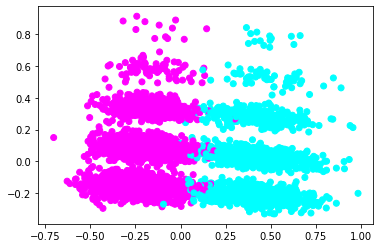

In [261]:
plt.scatter(plt_pca[:,0],plt_pca[:,1],c=y,cmap='cool')
plt.show()

## MANIFOLD LEARNING


*   T-SNE




In [262]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)

In [263]:
plt_tsne = tsne.fit_transform(X)

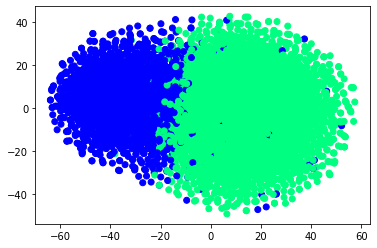

In [264]:
plt.scatter(plt_tsne[:,0],plt_tsne[:,1],c=y,cmap='winter')
plt.show()

# CLUSTRING

## KMEANS

In [265]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
plt_kmeans=kmeans.fit_transform(X)

In [266]:
kmeans.cluster_centers_[0]

array([0.17246377, 0.09440419, 0.13446055, 0.13234702, 0.13677536,
       0.1692029 , 0.16533816, 0.1647343 , 0.11671843, 0.12284334,
       0.16702899, 0.10514795, 0.14261272, 0.11663216, 0.10160024,
       0.16364734, 0.13768116, 0.1361715 , 0.13838567, 0.11249137,
       0.16884058, 0.20878623, 0.13315217, 0.1439211 , 0.14200886,
       0.11896135, 0.10461957, 0.14009662, 0.10575181, 0.16618357,
       0.14724235, 0.13878824, 0.13969404, 0.1589372 , 0.12267081,
       0.21180556, 0.11827122, 0.16497585, 0.16992754, 0.14080113,
       0.14029791, 0.17729469, 0.1705314 , 0.13576892, 0.14623591,
       0.17004831, 0.13425926, 0.11758109, 0.10529891, 0.12146308,
       0.17487923, 0.14623591, 0.13758052, 0.1386876 , 0.09165325,
       0.09178744, 0.13989533, 0.16243961, 0.12068668, 0.16062802])

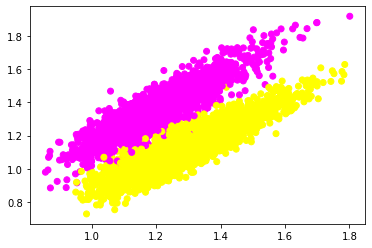

In [267]:
plt.scatter(plt_kmeans[:,0],plt_kmeans[:,1],c=y,cmap='spring')

In [ ]:
from sklearn.metrics import silhouette_score 
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.07747453525646954
For no of clusters = 3  The average silhouette_score is : 0.022680612084652624
For no of clusters = 4  The average silhouette_score is : 0.019907680887891865
For no of clusters = 5  The average silhouette_score is : 0.019681026749431556
For no of clusters = 6  The average silhouette_score is : 0.018664609490379826
For no of clusters = 7  The average silhouette_score is : 0.016890014506499795
For no of clusters = 8  The average silhouette_score is : 0.01781650170300932


In [ ]:
from sklearn.metrics import davies_bouldin_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    davies_bouldin_score_ = davies_bouldin_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", davies_bouldin_score_)

For no of clusters = 2  The average silhouette_score is : 3.6821241369742195
For no of clusters = 3  The average silhouette_score is : 5.483307657189662
For no of clusters = 4  The average silhouette_score is : 5.337923723077335
For no of clusters = 5  The average silhouette_score is : 5.086683027892279
For no of clusters = 6  The average silhouette_score is : 5.627007328666147
For no of clusters = 7  The average silhouette_score is : 5.497320065532029
For no of clusters = 8  The average silhouette_score is : 5.51583672037343


In [ ]:
from sklearn.metrics import calinski_harabasz_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    calinski_harabasz_score_ = calinski_harabasz_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", calinski_harabasz_score_)

For no of clusters = 2  The average silhouette_score is : 329.6908627870445
For no of clusters = 3  The average silhouette_score is : 204.84745713606821
For no of clusters = 4  The average silhouette_score is : 154.878231676702
For no of clusters = 5  The average silhouette_score is : 129.90593977244063
For no of clusters = 6  The average silhouette_score is : 113.02868052618557
For no of clusters = 7  The average silhouette_score is : 100.69100521632332
For no of clusters = 8  The average silhouette_score is : 92.41280962708528


## KMODES

In [268]:
!pip install kmodes

In [271]:
from kmodes.kmodes import KModes
kmodes=KModes(n_clusters=2)
pred= kmodes.fit_predict(X)

In [270]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y))
print(classification_report(pred,y))

[[ 811 2486]
 [ 865  838]]
              precision    recall  f1-score   support

           0       0.48      0.25      0.33      3297
           1       0.25      0.49      0.33      1703

    accuracy                           0.33      5000
   macro avg       0.37      0.37      0.33      5000
weighted avg       0.40      0.33      0.33      5000



In [282]:
from sklearn.metrics import silhouette_score 
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KModes(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.014407855498001778
For no of clusters = 3  The average silhouette_score is : 0.0018478915559007171
For no of clusters = 4  The average silhouette_score is : -0.00011438478516385358
For no of clusters = 5  The average silhouette_score is : -0.004561308933956102
For no of clusters = 6  The average silhouette_score is : -0.006850303822235489
For no of clusters = 7  The average silhouette_score is : -0.007625201399189871
For no of clusters = 8  The average silhouette_score is : -0.008021119253693209


In [283]:
from sklearn.metrics import davies_bouldin_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KModes(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    davies_bouldin_score_ = davies_bouldin_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", davies_bouldin_score_)

For no of clusters = 2  The average silhouette_score is : 10.220138586757745
For no of clusters = 3  The average silhouette_score is : 13.253408893410858
For no of clusters = 4  The average silhouette_score is : 12.952868605614054
For no of clusters = 5  The average silhouette_score is : 13.674383662551174
For no of clusters = 6  The average silhouette_score is : 13.25746819552297
For no of clusters = 7  The average silhouette_score is : 13.803802021116827
For no of clusters = 8  The average silhouette_score is : 13.079350743744794


In [284]:
from sklearn.metrics import calinski_harabasz_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = KModes(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    calinski_harabasz_score_ = calinski_harabasz_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", calinski_harabasz_score_)

For no of clusters = 2  The average silhouette_score is : 42.7153379210366
For no of clusters = 3  The average silhouette_score is : 24.112291713793518
For no of clusters = 4  The average silhouette_score is : 23.83768546417449
For no of clusters = 5  The average silhouette_score is : 16.661014204159123
For no of clusters = 6  The average silhouette_score is : 15.947294534502955
For no of clusters = 7  The average silhouette_score is : 15.287169700349502
For no of clusters = 8  The average silhouette_score is : 14.38712317967436


## HIRARICAL CLUSTRING

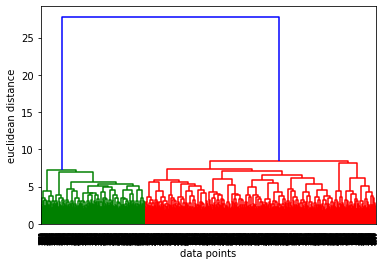

In [272]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(X, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [273]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
pred = hc.fit_predict(X)

In [274]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y))
print(classification_report(pred,y))

[[ 194 3242]
 [1482   82]]
              precision    recall  f1-score   support

           0       0.12      0.06      0.08      3436
           1       0.02      0.05      0.03      1564

    accuracy                           0.06      5000
   macro avg       0.07      0.05      0.05      5000
weighted avg       0.09      0.06      0.06      5000



In [285]:
from sklearn.metrics import silhouette_score 
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = AgglomerativeClustering(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.07228335340664212
For no of clusters = 3  The average silhouette_score is : 0.018958483569333526
For no of clusters = 4  The average silhouette_score is : 0.01177475587470425
For no of clusters = 5  The average silhouette_score is : 0.005851566965768208
For no of clusters = 6  The average silhouette_score is : 0.003483689386412969
For no of clusters = 7  The average silhouette_score is : 0.0017677679555331651
For no of clusters = 8  The average silhouette_score is : 0.0006931606549361955


In [286]:
from sklearn.metrics import davies_bouldin_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = AgglomerativeClustering(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    davies_bouldin_score_ = davies_bouldin_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", davies_bouldin_score_)

For no of clusters = 2  The average silhouette_score is : 3.890931770982736
For no of clusters = 3  The average silhouette_score is : 7.1129868694642555
For no of clusters = 4  The average silhouette_score is : 5.9982933004063606
For no of clusters = 5  The average silhouette_score is : 7.504405644720224
For no of clusters = 6  The average silhouette_score is : 7.626555954526279
For no of clusters = 7  The average silhouette_score is : 7.513334954809941
For no of clusters = 8  The average silhouette_score is : 7.326185775462302


In [287]:
from sklearn.metrics import calinski_harabasz_score  
no_of_clusters = range(2,10-1)
for n_clusters in no_of_clusters: 
    cluster = AgglomerativeClustering(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    calinski_harabasz_score_ = calinski_harabasz_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", calinski_harabasz_score_)

For no of clusters = 2  The average silhouette_score is : 287.190623041074
For no of clusters = 3  The average silhouette_score is : 157.4538506252303
For no of clusters = 4  The average silhouette_score is : 113.77389355860105
For no of clusters = 5  The average silhouette_score is : 90.74541178955053
For no of clusters = 6  The average silhouette_score is : 76.83608401141235
For no of clusters = 7  The average silhouette_score is : 67.42875953260713
For no of clusters = 8  The average silhouette_score is : 60.62722766878946
